<a href="https://colab.research.google.com/github/Rontim/GPU-Parallel-Processing-AI/blob/main/gpu_programming/gpu_detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch

In [3]:
import cupy as cp

In [11]:
# Uninstall the broken version
!pip uninstall -y cupy cupy-cuda12x

# Install the correct version that actually works on Colab
!pip install cupy-cuda11x

Found existing installation: cupy-cuda12x 13.3.0
Uninstalling cupy-cuda12x-13.3.0:
  Successfully uninstalled cupy-cuda12x-13.3.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.0/100.0 MB 6.5 MB/s eta 0:00:00


In [1]:
import torch
print("CUDA available:", torch.cuda.is_available())
if torch.cuda.is_available():
    print("Device name:", torch.cuda.get_device_name(0))
    print("Device count:", torch.cuda.device_count())

CUDA available: True
Device name: Tesla T4
Device count: 1


In [4]:
import cupy as cp
import time

def gpu_vector_addition(n=10**6):
    print("Creating random vectors...")
    a = cp.random.rand(n)
    b = cp.random.rand(n)

    print("Adding vectors on the GPU...")
    start = time.time()
    c = a + b
    cp.cuda.Stream.null.synchronize()  # Ensure completion
    end = time.time()

    print(f"Completed in {end - start:.6f} seconds")
    print(f"First 5 elements of result: {c[:5]}")

if __name__ == "__main__":
    gpu_vector_addition()


Creating random vectors...
Adding vectors on the GPU...
Completed in 0.095035 seconds
First 5 elements of result: [1.16764102 0.69490644 1.44064066 0.41452364 1.4774886 ]


In [8]:
import cupy as cp

def detect_gpu():
    device_count = cp.cuda.runtime.getDeviceCount()
    print(f"Number of CUDA-enabled GPUs detected: {device_count}")

    for i in range(device_count):
        device = cp.cuda.Device(i)
        attrs = device.attributes
        print(f"\nGPU {i}: {cp.cuda.runtime.getDeviceProperties(i)['name'].decode('utf-8')}")
        # print(f"  Memory Clock Rate (KHz): {attrs.get(cp.cuda.CLOCK_RATE)}")
        print(f"  Total Memory (bytes): {device.mem_info[1]}")
        print(f"  Free Memory (bytes): {device.mem_info[0]}")
        # print(f"  Multi-Processor Count: {attrs.get(cp.cuda.device_attribute.MULTIPROCESSOR_COUNT)}")
        print(f"  Compute Capability: {device.compute_capability}")

if __name__ == "__main__":
    detect_gpu()


Number of CUDA-enabled GPUs detected: 1

GPU 0: Tesla T4
  Total Memory (bytes): 15828320256
  Free Memory (bytes): 15691022336
  Compute Capability: 75


In [10]:
import numpy as np
import cupy as cp
import time

# Matrix size
N = 8000

# CPU (NumPy)
a_cpu = np.random.rand(N, N).astype(np.float32)
b_cpu = np.random.rand(N, N).astype(np.float32)

start = time.time()
c_cpu = np.dot(a_cpu, b_cpu)
cpu_time = time.time() - start
print(f"CPU (NumPy) time: {cpu_time:.4f} seconds")

# GPU (CuPy)
a_gpu = cp.asarray(a_cpu)
b_gpu = cp.asarray(b_cpu)

cp.cuda.Device(0).synchronize()  # just to be safe
start = time.time()
c_gpu = cp.dot(a_gpu, b_gpu)
cp.cuda.Device(0).synchronize()
gpu_time = time.time() - start
print(f"GPU (CuPy) time: {gpu_time:.4f} seconds")

# Optional: Compare outputs
diff = np.abs(c_cpu - cp.asnumpy(c_gpu)).max()
print(f"Max difference between CPU and GPU results: {diff}")


CPU (NumPy) time: 7.1356 seconds
GPU (CuPy) time: 0.3258 seconds
Max difference between CPU and GPU results: 0.013427734375


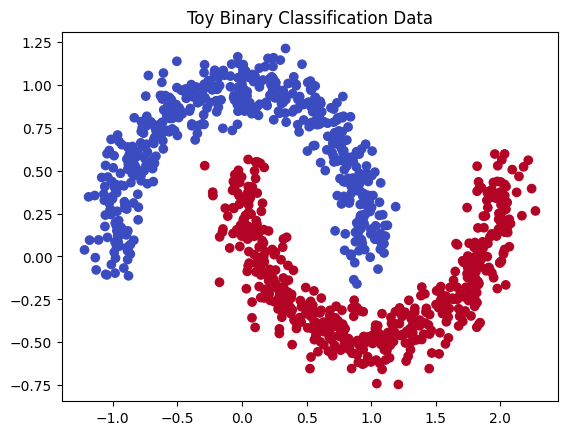

In [11]:
import cupy as cp
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

# CPU for data generation (CuPy doesn't do this)
X, y = make_moons(n_samples=1000, noise=0.1, random_state=42)

# Visualize it
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
plt.title("Toy Binary Classification Data")
plt.show()

# Move data to GPU
X_gpu = cp.asarray(X)  # shape (1000, 2)
y_gpu = cp.asarray(y).reshape(-1, 1)  # shape (1000, 1)
